# Numpy


NumPy (short for Numerical Python) provides an efficient interface to store and operate on dense data buffers. 
- In some ways, NumPy arrays are like Python’s built-in list type, but NumPy arrays provide much more efficient storage and data operations as the arrays grow larger in size.
- NumPy arrays form the core of nearly the entire ecosystem of data science tools in Python

First, install `numpy` and load it. I checked my version of `numpy` and upgraded it since it's outdated.

In [63]:
import numpy as np
np.__version__

'1.21.0'

In [53]:
%%cmd
pip list --outdated

Microsoft Windows [Version 10.0.19044.1766]
(c) Microsoft Corporation. All rights reserved.

C:\Users\Yuxiao Luo\Documents\python3\Analytics_Python\Data_Wrangling>pip list --outdated
Package             Version   Latest      Type
------------------- --------- ----------- -----
argon2-cffi         20.1.0    21.3.0      wheel
attrs               21.2.0    21.4.0      wheel
beautifulsoup4      4.10.0    4.11.1      wheel
bleach              3.3.0     5.0.0       wheel
certifi             2021.5.30 2022.6.15   wheel
cffi                1.14.6    1.15.0      wheel
charset-normalizer  2.0.12    2.1.0       wheel
click               8.0.1     8.1.3       wheel
colorama            0.4.4     0.4.5       wheel
cycler              0.10.0    0.11.0      wheel
decorator           5.0.9     5.1.1       wheel
entrypoints         0.3       0.4         wheel
idna                2.10      3.3         wheel
ipykernel           5.5.5     6.15.0      wheel
ipython             7.24.1    8.4.0       wheel
je

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Built-In Documentation
- Display all the contents of the numpy namespace: `np.<TAB>`

- Display NumPy's built-in documentation: `np?`

- More detailed documentatio, tutorials and other resources, go to http://www.numpy.org.

### Data Types in Python

- The standard Python implementation is written in C. This means that every Python object is simply a cleverly disguised C structure, which contains not only its value, but other information as well.

- This extra information in the Python integer structure is what allows Python to be coded so freely and dynamically. All this additional information in Python types comes at a cost, however, which becomes especially apparent in structures that combine many of these objects.

- There is some overhead in storing an integer in Python as compared to an integer in a compiled language like C. 

<br><br>
<center><img src="images/Numpy_1.JPG" width = "500"></center>
<center>Difference between C and Python integers (Ref. Python Data Science Handbook)</center>

#### Dynamic-type list & fixed-type array (NumPy-style)
- The array contains a single pointer to one contiguous block of data. 

- The Python list, contains a pointer to a block of pointers, each of which in turn points to full Python object like the Python integer. 

- The advantage of the list is flexibility: because each list element is a full structure containing both data and type information, the list can be filled with data of any desired type

- Fixed-type NumPy-style arrays lack this flexibility, but are much more efficient for storing and manipulating data.

In [68]:
# we can use list to hold multiple items in Python
L = list(range(10))
L

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [69]:
L2 = [str(c) for c in L]
L2

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [72]:
L3 = [True, "2", 3.0, 4]
[type(element) for element in L3]

[bool, str, float, int]

## NumPy Arrays
### Overview
- Support vectorized operations, while lists don't
- In the context of high-level languages like Python, Matlab, and R, the term vectorization describes the use of optimized, pre-compiled code written in a low-level language (e.g. C) to perform mathematical operations over a sequence of data
- cannot be changed in size -- have to create a new array or overwrite existing one
- each has one and only one dtype - all items in each array are of that same dtype
- an equivalent numpy array occupies much less space than a python list
- http://www.numpy.org

### Creating array from Python lists

In [75]:
# create arrays from Python lists
np.array([1, 4, 2, 5, 3])

# NumPy is constrained to arrays containing the same type 
# integers are upcast to floating point 
np.array([3.14, 4, 2, 3])

array([1, 4, 2, 5, 3])

array([3.14, 4.  , 2.  , 3.  ])

In [76]:
# set the data type: use dtype keyword
# https://numpy.org/doc/stable/reference/arrays.dtypes.html 
np.array([1, 2, 3, 4], dtype = "float32")

array([1., 2., 3., 4.], dtype=float32)

In [79]:
# nested lists result in multidimensional arrays
np.array([range(i, i+4) for i in [2, 4, 6]])

array([[2, 3, 4, 5],
       [4, 5, 6, 7],
       [6, 7, 8, 9]])

### Creating array from scratch
Numpy offers built-in routines to create arrays.

In [82]:
# length-10 integer array filled with zeros
np.zeros(10, dtype = int)

# 3x5 floating-point array filled with 1s
np.ones((3,5), dtype = float)

# 3x5 array filled with 3.14 
np.full((3,5), 3.14)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [83]:
# array filled with linear sequence 
# starting at 0, ending at 20, stepping by 2
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [84]:
# array of five values evenly spaced between 0 and 1
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [85]:
# 3x3 array of uniformly distributed 
# random values between 0 and 1
np.random.random((3,3))

array([[0.33739616, 0.64817187, 0.36824154],
       [0.95715516, 0.14035078, 0.87008726],
       [0.47360805, 0.80091075, 0.52047748]])

In [86]:
# 3x3 array of normally distributed random values 
# with mean 0 and standard deviation 1
np.random.normal(0, 1, (3,3))

array([[ 1.16827314,  0.94718595,  1.08548703],
       [ 2.38222445, -0.40602374,  0.26644534],
       [-1.35571372, -0.11410253, -0.84423086]])

In [88]:
# 3x3 array of random integers in the interval [0, 10)
np.random.randint(0, 10, (3,3))

array([[7, 9, 9],
       [3, 6, 7],
       [2, 0, 3]])

In [93]:
# 3x3 identity matrix
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [90]:
# uninitialized array of 3 integers 
# values will be whatever happens to already exist at that memory location
np.empty(3)

array([1., 1., 1.])

#### NumPy Standard Data Types

The standard NumPy data types are listed below. 
- When constructing an array, you can specify them using a string:
`np.zeros(10, dtype = 'int16)`
- Or using the associated NumPy object: 
`np.zeros(10, dtype = np.int16)`


<br><br>
<center><img src="images/numpy_2.JPG" width = "500"></center>
<center>Figure.2 Standard NumPy data types </center>

### Basics of Numpy arrays
- Attributes of arrays: determining the size, shape, memory consumption, and data types of arrays
- Indexing of arrays: getting and setting the value of individual array elements
- Slicing of arrays: getting and setting smaller subarrays within a larger array
- Reshaping of arrays: changing the shape of a given array
- Joining and splitting of arrays: combining multiple arrays into one, and splitting one array into many

#### NumPy array attributes
- define arrays in different dimensions
- use NumPy's random number generator and `seed()` to ensure each time the random arrays are the same

In [136]:
import numpy as np 
np.random.seed(2022) # seed for reproducibility

x1 = np.random.randint(10, size = 6)
x2 = np.random.randint(10, size = (3,4)) 
x3 = np.random.randint(10, size = (3, 4, 5))

x1; x2; x3

array([0, 1, 1, 0, 7, 8])

array([[2, 8, 0, 5],
       [9, 1, 3, 8],
       [0, 3, 6, 8]])

array([[[0, 1, 2, 0, 5],
        [7, 5, 1, 7, 5],
        [5, 4, 8, 2, 3],
        [1, 0, 4, 5, 0]],

       [[7, 5, 5, 8, 2],
        [4, 0, 9, 4, 9],
        [8, 8, 0, 3, 9],
        [5, 2, 1, 7, 2]],

       [[1, 7, 9, 6, 6],
        [7, 2, 9, 1, 9],
        [4, 0, 4, 4, 7],
        [8, 7, 1, 2, 9]]])

In [137]:
# number of dimensions
x3.ndim
# size of each dimension
x2.shape
# total size of the array
x3.size
# data type of the array
x3.dtype
# itemsize: size (in bytes) of each array element
x3.itemsize
# nbytes: total size (in bytes) of the array
x3.nbytes

3

(3, 4)

60

dtype('int32')

4

240

#### Array indexing: accessing single elements
- In one-dimensional array, access the ith value using square brackets, like lists.
- In multidimensional array, access items using a comma-separated tuple of indices.
- NumPy arrays have fixed type. If you insert a floating-point vlaue to an integer array, the value will be sliently truncated.

In [142]:
x1
x1[4]
x1[-2]

array([0, 1, 1, 0, 7, 8])

7

7

In [145]:
x2

# 1st row, 1st col
x2[0,0]

# 1st row, 3rd col
x2[0,2]

array([[2, 8, 0, 5],
       [9, 1, 3, 8],
       [0, 3, 6, 8]])

2

0

In [146]:
# you can also modify values 
x2[0, 0] = 12
x2

array([[12,  8,  0,  5],
       [ 9,  1,  3,  8],
       [ 0,  3,  6,  8]])

In [148]:
x1
x1[0] = 3.1415926
# floating will be truncated
x1

array([0, 1, 1, 0, 7, 8])

array([3, 1, 1, 0, 7, 8])

#### Array Slicing: accessing subarrays

The NumPy slicing syntax is `x[start:stop:step]`. If any of these are unspecified, they default to the values `start=0, stop=size of dimension, step=1`.

In [150]:
#syntax
#x[start:stop:step]

#one dimension array
x = np.arange(10)
print(x)

#find first five elements from array x
x[0:5]
x[:5]

#find a middle subarray 
x[3:7]

#find even numbers from x
x[0::2]

#find odd numbers from x
x[1::2]

[0 1 2 3 4 5 6 7 8 9]


array([0, 1, 2, 3, 4])

array([0, 1, 2, 3, 4])

array([3, 4, 5, 6])

array([0, 2, 4, 6, 8])

array([1, 3, 5, 7, 9])

In [39]:
x[1::2,:2]

array([[3, 3],
       [4, 6]])

In [14]:
#Multidimensional subarrays

# reproduction
np.random.seed(0)

x = np.random.randint(20,size=(4,3))

print(x)

#find first two rows, three columns
x[:2]
x[:2,:3]

#second row
x[1:2]
x[1]

#first column
x[:, 0]

#first two columns, 2nd and 4th rows
x[1::2, :2 ]


[[12 15  0]
 [ 3  3  7]
 [ 9 19 18]
 [ 4  6 12]]


array([[12, 15,  0],
       [ 3,  3,  7]])

array([[12, 15,  0],
       [ 3,  3,  7]])

array([[3, 3, 7]])

array([3, 3, 7])

array([12,  3,  9,  4])

array([[3, 3],
       [4, 6]])

In [98]:
#fancy indexing
#pass an array of indices to access multiple array elements at once

rand = np.random.RandomState([42])
x = rand.randint(100, size=10)

#x =np.random.randint(100, size = 10)

print(x)
#access three different elements
print([x[3],x[4],x[6]])

#pass the indice to x
ind = [3,4,6]
print(x[ind])

#pass a two-dimension array of indices
# numpy.reshape(array, shape, order = 'C')
# shape is int or tuple or ints
ind1 = np.array([3,4,5,7]).reshape((2,2))
print(ind1)

print(x[ind1])

#in a multi-dimension array
y = np.arange(12).reshape((3, 4))
row = np.array([0, 1, 2])
col = np.array([1, 2, 3])
print(y)

# retrieve cell from matrix
print(y[row, col])

[29 81 87 16 94 41 39 51 80 52]
[16, 94, 39]
[16 94 39]
[[3 4]
 [5 7]]
[[16 94]
 [41 51]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ 1  6 11]


In [99]:
print(y)

#combined indexing
y[2, [2, 1, 3]]

y[1:,[2, 1, 3]]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


array([10,  9, 11])

array([[ 6,  5,  7],
       [10,  9, 11]])

In [107]:
# using fancy indexing in data science projects
# select random points

#create a two-dimension normal distribution
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]

x = rand.multivariate_normal(mean, cov, 100)

#x = np.random.normal()
#print(x)

# dimension of matrix
x.shape

#select 20 random points
#create indices:choosing 20 random indices with no repeats
# choice method: https://www.geeksforgeeks.org/numpy-random-choice-in-python/
indices = np.random.choice(100, 20, replace = False)
print(indices)

selection = x[indices]
print(selection)
selection.shape


(100, 2)

[98 96 14 55 15 77 61 11 21 41 38 52 72 39 74 44 28 92  2 95]
[[ 0.39429174  1.11514   ]
 [ 1.17614656  3.37945328]
 [-1.25705649 -1.38143418]
 [ 1.08637403  0.39556922]
 [-0.65511929 -0.30227716]
 [-0.01929616  0.66820101]
 [ 0.5376214   2.45381299]
 [ 0.62644605  0.73181144]
 [-0.20875371  0.14498346]
 [ 0.25660302 -0.08691508]
 [ 1.81516219  4.36844979]
 [-0.38137681 -1.11384696]
 [ 0.0874623   2.03295707]
 [-0.48726184 -1.16972636]
 [ 0.99308465  1.24785633]
 [-0.22925522  0.69428969]
 [ 0.66038865  0.58273172]
 [ 0.77883571  0.05575367]
 [-0.11975441  1.9464288 ]
 [ 0.08758536 -0.86523504]]


(20, 2)

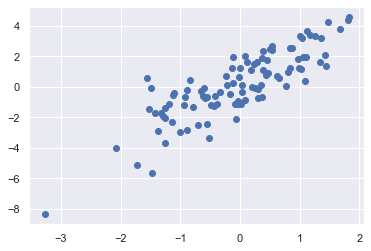

In [108]:
#plot
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; 

seaborn.set() # for plot styling

# first column, second column
plt.scatter(x[:, 0],x[:, 1])

<IPython.core.display.Javascript object>


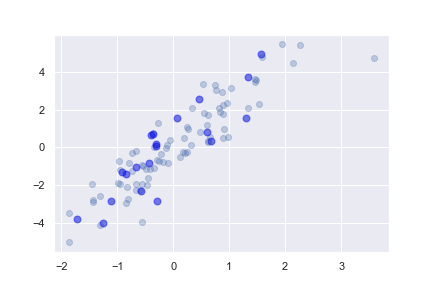

In [46]:
%matplotlib notebook
plt.scatter(x[:, 0],x[:, 1], alpha = 0.3)
plt.scatter(selection[:,0],selection[:,1], c ='blue',s = 50, alpha = 0.4)

In [164]:
array1 = np.arange(9).reshape((3,3))
array2 = np.arange(3)
array1
array2

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

array([0, 1, 2])

In [166]:
array = np.arange(4)

In [167]:
#common vectorized computation methods
array1 + array2
array1 * array2
np.dot(array1, array2)
np.mean

np.max(array, axis = None) # or '0' for column-wise, or '1' for row-wise
np.maximum(array1, array2)
np.min(array, axis = None) # or '0' for column-wise, or '1' for row-wise
np.minimum(array1, array2)
np.median
np.cumsum
np.sqrt
np.exp
np.add
np.subtract

array([[ 0,  2,  4],
       [ 3,  5,  7],
       [ 6,  8, 10]])

array([[ 0,  1,  4],
       [ 0,  4, 10],
       [ 0,  7, 16]])

array([ 5, 14, 23])

<function numpy.mean(a, axis=None, dtype=None, out=None, keepdims=<no value>, *, where=<no value>)>

3

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

0

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

<function numpy.median(a, axis=None, out=None, overwrite_input=False, keepdims=False)>

<function numpy.cumsum(a, axis=None, dtype=None, out=None)>

<ufunc 'sqrt'>

<ufunc 'exp'>

<ufunc 'add'>

<ufunc 'subtract'>

In [116]:
array1 = np.arange(12).reshape((4,3))
array2 = np.random.randint(1,20,(3,4))

np.dot(array1, array2)
#np.mean(array1)
#print(array1)
#np.max(array1,axis=1)
#np.min(array1, axis = 0)

array([[ 28,  17,  18,  30],
       [ 94,  83,  66, 114],
       [160, 149, 114, 198],
       [226, 215, 162, 282]])

### Broadcasting
a set of rules for applying binary ufuncs (addition, subtraction, multiplication, etc.) on arrays of different sizes.

- Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.
- Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
- Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

In [6]:
#Broadcasting
a1 = np.arange(3)
a2 = np.ones((3,3),dtype='int')
a3 = np.ones((3,2),dtype='int')

print(a1.shape,'\n',a2.shape,'\n',a3.shape)
a1 + 5

print(a3)
#a3 + a1


(3,) 
 (3, 3) 
 (3, 2)
[[1 1]
 [1 1]
 [1 1]]


In [3]:
x = np.arange(1, 6)
y = np.arange(2, 7)

#np.add(x,y)

#reduce: repeatedly applies a given operation to the elements of an array until only a single result remains.
np.add.reduce(x)
np.multiply.reduce(x)

#store all the intermediate results of the computation
np.add.accumulate(x)

#create a multiplication table
#np.outer : computer outer product of two vectors


array([ 1,  3,  6, 10, 15])

In [12]:
#Working with Boolean Arrays
np.random.seed(1)
x = np.random.randint(1,100,(3,4))

print(x)
x < 6
# how many values less than 6?
np.count_nonzero(x < 6)
np.sum(x < 6)

# how many values less than 6 in each row?
np.sum(x < 6, axis = 1)

# are there any values greater than 8?
np.any(x > 8)

# are all values in each row less than 8?
np.all(x > 8, axis = 1)

# what values are greater than 8?
x[x > 8]


[[38 13 73 10]
 [76  6 80 65]
 [17  2 77 72]]


array([38, 13, 73, 10, 76, 80, 65, 17, 77, 72])

In [15]:
#example

#president_heights.csv

#https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/data/president_heights.csv

import pandas as pd
url = 'https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/president_heights.csv'
df = pd.read_csv(url,index_col = 0)
df

,name,height(cm)
order,,
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189
4,James Madison,163
5,James Monroe,183
6,John Quincy Adams,171
7,Andrew Jackson,185
8,Martin Van Buren,168
9,William Henry Harrison,173


In [19]:
height = np.array(df['height(cm)'])

array([189, 170, 189, 163, 183, 171, 185, 168, 173, 183, 173, 173, 175,
       178, 183, 193, 178, 173, 174, 183, 183, 168, 170, 178, 182, 180,
       183, 178, 182, 188, 175, 179, 183, 193, 182, 183, 177, 185, 188,
       188, 182, 185])

In [21]:
height = np.array(df['height(cm)'])

#check basic statistics
print("Mean height: ", height.mean())
print("Standard deviation:", height.std() )
print("Minimum height: ", height.min())
print("Maximum height: ", height.max())

Mean height:  179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:  163
Maximum height:  193


In [30]:
#find heights greater than 165cm and less than 185cm
print(height[ (height > 165) & (height < 185)])

[170 183 171 168 173 183 173 173 175 178 183 178 173 174 183 183 168 170
 178 182 180 183 178 182 175 179 183 182 183 177 182]
[170 163 183 171 168 173 183 173 173 175 178 183 178 173 174 183 183 168
 170 178 182 180 183 178 182 175 179 183 182 183 177 182]


In [35]:
#sorting
np.random.seed(1)
x = np.random.randint(1,100,(3,4))

print(x)
#np.sort()
#sort arrays without modifying the input
np.sort(x)
np.sort(x, axis = 0)

#np.argsort(): returns the indices of the sorted elements
type(np.argsort(x))


[[38 13 73 10]
 [76  6 80 65]
 [17  2 77 72]]


numpy.ndarray

In [45]:
#Numpy structured arrays
#provide efficient storage for compound, heterogeneous data

name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]

# Use a compound data type for structured arrays
data = np.zeros(4, dtype={'names':('name', 'age', 'weight'),
'formats':('U10', 'int', 'float')})

data['name'] = name
data['age'] = age
data['weight'] = weight
data

# Get all names
data['name']

# Get first row of data
data[0]

# Get the name from the last row


# Get names where age is under 30


('Alice', 25, 55.)